In [1]:
# Imports
# Imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#load the data
yoga = np.load('full%2Fnumpy_bitmap%2Fyoga.npy')
dog = np.load('full%2Fnumpy_bitmap%2Fdog.npy')
flipflops = np.load('full%2Fnumpy_bitmap%2Fflip flops.npy')
bandage = np.load('full%2Fnumpy_bitmap%2Fbandage.npy')
airplane= np.load('full%2Fnumpy_bitmap%2Fairplane.npy')
bear= np.load('full%2Fnumpy_bitmap%2Fbear.npy')

# print number of images in dataset and numpy array size of each image
print ("no_of_pics, pixels_size")
print(yoga.shape)
print(dog.shape)
print(flipflops.shape)
print(bandage.shape)
print(airplane.shape)
print(bear.shape)

no_of_pics, pixels_size
(280442, 784)
(152159, 784)
(121518, 784)
(147614, 784)
(151623, 784)
(134762, 784)


In [3]:
# add a column with labels, 0=yoga, 1=dog, 2=flipflops, 3=bandage , 4=aiplane , 5=bear
yoga  = np.c_[yoga , np.zeros(len(yoga))]
dog = np.c_[dog, np.ones(len(dog))]
flipflops = np.c_[flipflops, 2*np.ones(len(flipflops))]
bandage = np.c_[bandage, 3*np.ones(len(bandage))]
airplane = np.c_[airplane, 4*np.ones(len(airplane))]
bear = np.c_[bear, 5*np.ones(len(bear))]

In [4]:
dog

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
# Function to plot 28x28 pixel drawings that are stored in a numpy array.
# Specify how many rows and cols of pictures to display (default 4x5).  
# If the array contains less images than subplots selected, surplus subplots remain empty.
def plot_samples(input_array, rows=1, cols=7, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

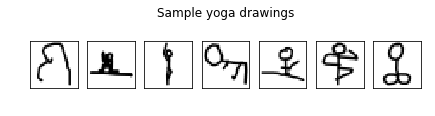

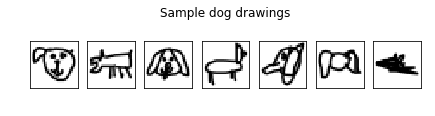

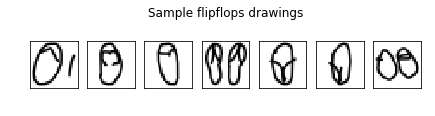

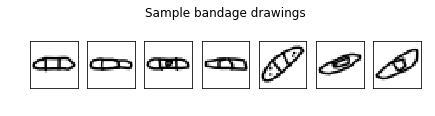

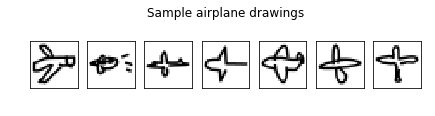

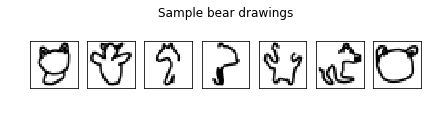

In [6]:
# Plot arm samples
plot_samples(yoga, title='Sample yoga drawings\n')
plot_samples(dog, title = 'Sample dog drawings\n')
plot_samples(flipflops, title = 'Sample flipflops drawings\n')
plot_samples(bandage, title = 'Sample bandage drawings\n')
plot_samples(airplane, title = 'Sample airplane drawings\n')
plot_samples(bear, title = 'Sample bear drawings\n')

In [7]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((yoga[:10000,:-1], dog[:10000,:-1], flipflops[:10000,:-1], bandage[:10000,:-1], airplane[:10000,:-1], bear[:10000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((yoga[:10000,-1], dog[:10000,-1], flipflops[:10000,-1], bandage[:10000,-1],airplane[:10000,-1],bear[:10000,-1]), axis=0).astype('float32') # the last column

In [8]:
# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.3,random_state=0)

In [9]:
 # one hot encode outputs (convert class labels to binary class matrices (one-hot) with the Keras utility to_categorical)
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]
   

In [10]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
s = X_train_cnn.shape
print (s, num_classes)

(42000, 1, 28, 28) 6


In [11]:
# define the CNN model
def cnn_model():
    # create model
    model = Sequential()
    
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
%%time

# build the model
model = cnn_model()
# Fit the model
history = model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=20, batch_size=50)
# Final evaluation of the model
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1]*100, "%")

# Save weights
model.save_weights('quickdraw_neuralnet.h5')
model.save('quickdraw.model')
print ("Model is saved")

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 1314s 31ms/step - loss: 0.8477 - acc: 0.7000 - val_loss: 0.5932 - val_acc: 0.7950
Epoch 2/20
42000/42000 [==============================] - 1307s 31ms/step - loss: 0.5694 - acc: 0.8040 - val_loss: 0.4888 - val_acc: 0.8323
Epoch 3/20
42000/42000 [==============================] - 1309s 31ms/step - loss: 0.4923 - acc: 0.8296 - val_loss: 0.4562 - val_acc: 0.8448
Epoch 4/20
42000/42000 [==============================] - 1263s 30ms/step - loss: 0.4508 - acc: 0.8442 - val_loss: 0.4170 - val_acc: 0.8567
Epoch 5/20
42000/42000 [==============================] - 1305s 31ms/step - loss: 0.4207 - acc: 0.8530 - val_loss: 0.4071 - val_acc: 0.8596
Epoch 6/20
42000/42000 [==============================] - 1303s 31ms/step - loss: 0.3964 - acc: 0.8623 - val_loss: 0.3968 - val_acc: 0.8627
Epoch 7/20
42000/42000 [==============================] - 1306s 31ms/step - loss: 0.3777 - acc: 0.8668 - val_l

In [13]:
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D

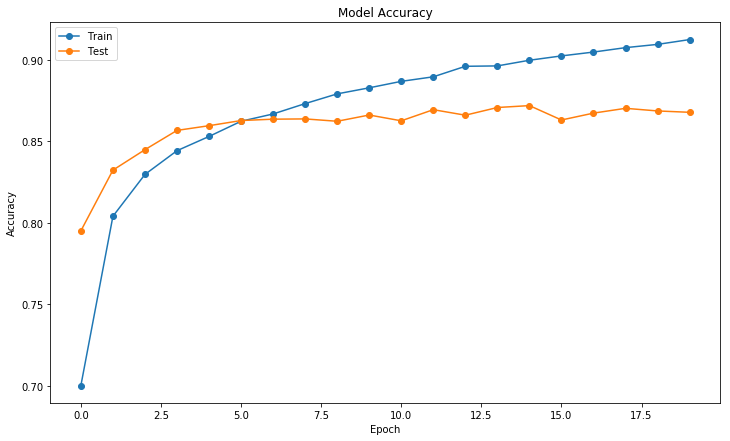

In [14]:
# Plotting the history of accuracy 
fig=plt.figure(figsize=(12,7))
line1=plt.plot(history.history['acc'],marker='o')
line2=plt.plot(history.history['val_acc'],marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [34]:
class_names = ['yoga','dog','flipflops','bandage','airplane','bear']

In [35]:
# confusion matrix
def plot_confusion_matrix(predicted_classes):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    result = model.predict(X_test_cnn)
    cm = confusion_matrix(y_true=np.argmax(y_test_cnn, axis=1),  # True class for test-set.
                          y_pred=np.argmax(result, axis=1))  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

     # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [36]:
#predictions
result = model.predict(X_test_cnn)
#classifying to classes by taking the class with the highest prob 
y_pred=np.argmax(result, axis=1)

In [37]:
print("Confusion Matrix:")
plot_confusion_matrix(y_pred)

Confusion Matrix:
[2516  122   52   75   36  192] (0) yoga
[  80 2381   36   26   31  421] (1) dog
[  48   50 2761   60   16   47] (2) flipflops
[  73   71   81 2687   42   68] (3) bandage
[  63   86   16   42 2761   47] (4) airplane
[  68  311   54   42   24 2514] (5) bear
 (0) (1) (2) (3) (4) (5)


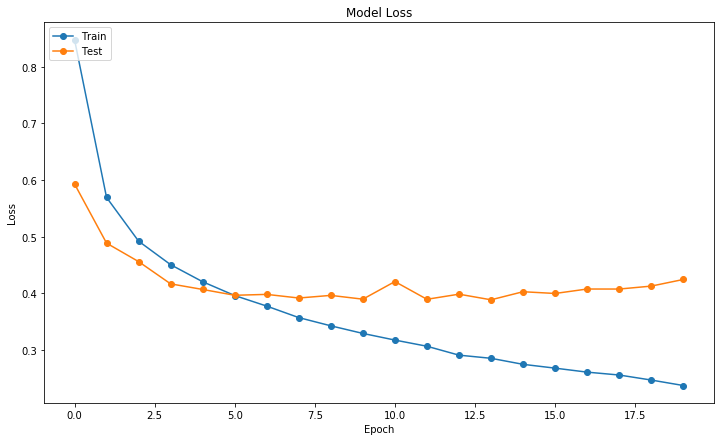

In [17]:
# Summarizing the history of loss
fig=plt.figure(figsize=(12,7))
plt.plot(history.history['loss'],marker='o')
plt.plot(history.history['val_loss'],marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [18]:
model = load_model('quickdraw.model')
model.summary()

img_width = 28
img_height = 28

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

The drawing is identified as -->  yoga  <-- with a probability of  99.99563694000244
The drawing is identified as -->  dog  <-- with a probability of  69.02900338172913


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The drawing is identified as -->  bear  <-- with a probability of  98.69571924209595
The drawing is identified as -->  yoga  <-- with a probability of  99.71965551376343
The drawing is identified as -->  airplane  <-- with a probability of  75.85859298706055
The drawing is identified as -->  bandage  <-- with a probability of  99.99462366104126
The drawing is identified as -->  flipflops  <-- with a probability of  99.99849796295166
The drawing is identified as -->  bear  <-- with a probability of  95.23402452468872


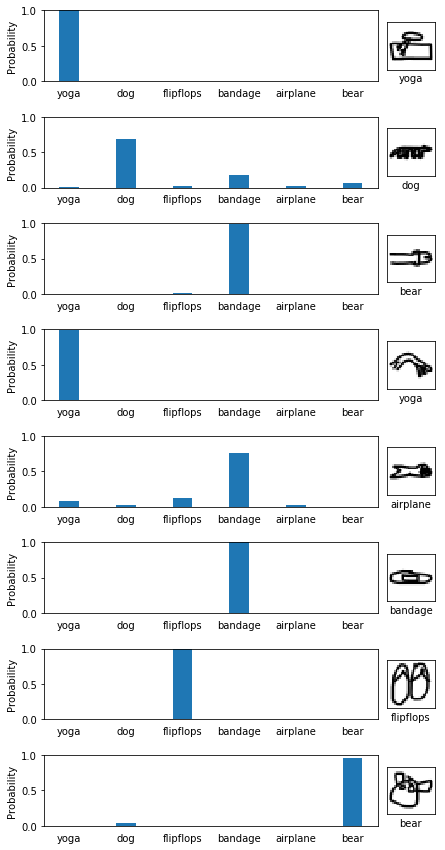

In [19]:
# store the label codes in a dictionary
label_dict = {0:'yoga', 1:'dog', 2:'flipflops', 3:'bandage', 4:'airplane', 5:'bear'}

#print X_test_cnn[0]
# CNN predictions
cnn_probab = model.predict(X_test_cnn, batch_size=32, verbose=0)
#print (cnn_probab[6])

# Plotting the X_test data and finding out the probabilites of prediction
fig, ax = plt.subplots(figsize=(7,15))
    
for i in list(range(8)):
    
    print ("The drawing is identified as --> ", label_dict[y_test[i]], " <-- with a probability of ", max(cnn_probab[i])*100)
    
# plot probabilities:
    ax = plt.subplot2grid((8, 7), (i, 0), colspan=6);
    plt.bar(np.arange(6), cnn_probab[i], 0.35, align='center');
    plt.xticks(np.arange(6), ['yoga','dog','flipflops','bandage','airplane','bear'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((8, 7), (i, 6), colspan=6);
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])  
 

In [33]:
#Untitle

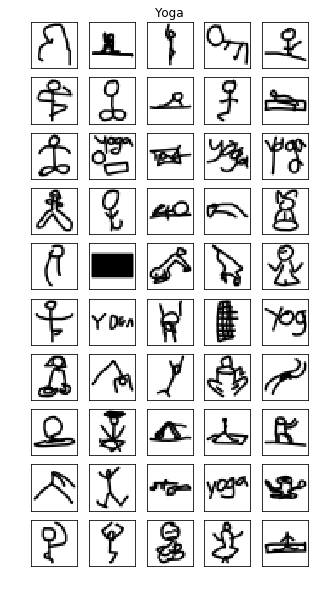

In [20]:
rows = 10
cols = 5
fig, ax = plt.subplots(figsize=(cols,rows))
ax.axis('off')
plt.title('Yoga')

for i in list(range(0, min(len(yoga),(rows*cols)) )):      
    a = fig.add_subplot(rows,cols,i+1)
    imgplot = plt.imshow(yoga[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
    plt.savefig('1.png')
    plt.xticks([])
    plt.yticks([])

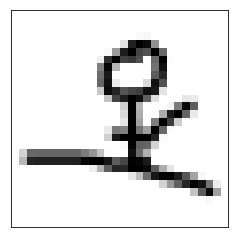

In [21]:
rows = 1
cols = 5

for i in list(range(0, min(len(yoga),(rows*cols)) )):      
    plt.imshow(yoga[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
    plt.savefig('2.png')
    plt.xticks([])
    plt.yticks([])